## Machine Learning Homework 2
## Billio Jeverson | 1002939


## Question 1 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"hw2-image.txt",header=None,delimiter=" ")
df.head()

,0,1,2
0,129,108,61
1,117,96,51
2,102,77,36
3,94,64,26
4,97,59,22


In [143]:
R = pd.Series([255,255,128,0,0,0,0,0])

In [144]:
G = pd.Series([255,0,0,255,128,0,0,0])

In [145]:
B = pd.Series([255,0,0,0,0,255,128,0])

In [146]:
initialCentroid= pd.concat([R,G,B], axis=1)

In [147]:
initialCentroid

,0,1,2
0,255,255,255
1,255,0,0
2,128,0,0
3,0,255,0
4,0,128,0
5,0,0,255
6,0,0,128
7,0,0,0


In [153]:
def cluster(centroid,points):
    centroid = np.matrix(centroid)
    points = np.matrix(points)
    cluster = []
    newCentroid = [[0,0,0]]
    for rows in points:
        cluster.append(np.argmin(np.sum(np.square(np.subtract(rows,centroid)),axis=1)))
        
    for i in range(len(centroid)):
        Sum=np.matrix([0,0,0])
        length = cluster.count(i)
        if (length>0):
            for j in range(len(points)):
                if cluster[j]==i:
                    Sum = np.add(Sum,points[j])
            mean = Sum/length
            newCentroid=np.vstack([newCentroid,mean])
        i+=1   
    return(cluster,np.delete(newCentroid,0,0))

In [154]:
def computeError(cluster,centroid,points):
    error = 0
    centroid = np.matrix(centroid)
    points = np.matrix(points)
    for i in range(len(centroid)):
        for j in range(len(points)):
            if cluster[j]==i:
                error = error + squareEuclidian(points[j],centroid[i])
            j+=1
    return(error)

In [155]:
def squareEuclidian(a,b):
    e = 0
    for i in a:
        e+=np.sum(np.square(np.subtract(i,b)))
    return(e)

In [156]:
def kmean(centroid, points):
    errorList = [1]
    b = cluster(centroid,points)
    centroid = b[1]
    errorList.append(computeError(b[0],centroid,points))
    
    while errorList[len(errorList)-1]!= errorList[len(errorList)-2]:
        a = cluster(centroid,points)
        centroid=a[1]
        err = computeError(a[0],centroid,points)
        print(err)
        errorList.append(err)
    return(centroid)
            

## Running the Kmean algorithm and check until there is no change in total cost

In [157]:
kmean(initialCentroid,df)

183025425.342
170742827.065
156809662.225
134268985.153
130100346.068
129763194.718
129668514.315
129617277.22
129586574.628
129569365.888
129548951.041
129535553.42
129518973.493
129504002.499
129488225.137
129473579.029
129454202.88
129432885.289
129397712.73
129328051.267
129140633.624
128566727.584
126462691.898
122853348.673
120732801.699
119474552.323
118685954.53
118237837.675
118046085.269
117967258.087
117929886.176
117910502.234
117897501.043
117890457.254
117888153.356
117887157.948
117886773.01
117886510.656
117886300.031
117886152.617
117886107.092
117886089.037
117886075.016
117886069.113
117886062.403
117886061.64
117886061.64


matrix([[ 241.2296146 ,  238.62515213,  233.86288032],
        [ 194.41158657,  136.33311389,   90.94364714],
        [ 136.2655563 ,   61.08973066,   10.10385457],
        [ 157.29173273,   97.59397508,   51.43329558],
        [  78.92743714,   37.10828688,   13.07070482],
        [  25.97800232,   23.23575423,   23.60599063]])

In [ ]:
z = cluster([[ 241.2296146 ,  238.62515213,  233.86288032],
        [ 194.41158657,  136.33311389,   90.94364714],
        [ 136.2655563 ,   61.08973066,   10.10385457],
        [ 157.29173273,   97.59397508,   51.43329558],
        [  78.92743714,   37.10828688,   13.07070482],
        [  25.97800232,   23.23575423,   23.60599063]],df)

# There is total 6 cluster and inside the cl list are all the different cluster

In [58]:
#no of cluster
cl = []
for x in z[0]:
    if x not in cl:
        cl.append(x)
print(cl)
#6 different clusters

[3, 2, 4, 5, 1, 0]


## Final Centroid with each cluster
### Element of the cl correspond to the index of the matrix below.
### Cluster 0 has centroid [ 241.2296146   238.62515213  233.86288032]

In [59]:
#final Centroid with each cluster
#based on index
#index = zero in this list, correspond to element 0 in above list
print(z[1])

[[ 241.2296146   238.62515213  233.86288032]
 [ 194.41158657  136.33311389   90.94364714]
 [ 136.2655563    61.08973066   10.10385457]
 [ 157.29173273   97.59397508   51.43329558]
 [  78.92743714   37.10828688   13.07070482]
 [  25.97800232   23.23575423   23.60599063]]


## Number of pixel associated with each cluster

In [493]:
#number of pixel associated to each cluster
noOfPixel = {}
for i in cl:
    noOfPixel[i] = z[0].count(i)
print(noOfPixel)

{3: 22075, 2: 52535, 4: 40365, 5: 74917, 1: 15190, 0: 4930}


In [495]:
#if u refer above when i did the kmeans method, i already printed out the cost
# which is the sum of squared Euclidean distance of each pixel to the nearest centroid

y =[183025425.342,
170742827.065,
156809662.225,
134268985.153,
130100346.068,
129763194.718,
129668514.315,
129617277.22,
129586574.628,
129569365.888,
129548951.041,
129535553.42,
129518973.493,
129504002.499,
129488225.137,
129473579.029,
129454202.88,
129432885.289,
129397712.73,
129328051.267,
129140633.624,
128566727.584,
126462691.898,
122853348.673,
120732801.699,
119474552.323,
118685954.53,
118237837.675,
118046085.269,
117967258.087,
117929886.176,
117910502.234,
117897501.043,
117890457.254,
117888153.356,
117887157.948,
117886773.01,
117886510.656,
117886300.031,
117886152.617,
117886107.092,
117886089.037,
117886075.016,
117886069.113,
117886062.403,
117886061.64,
117886061.64]

## Plotting Square euclidian distance against no of iterations

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

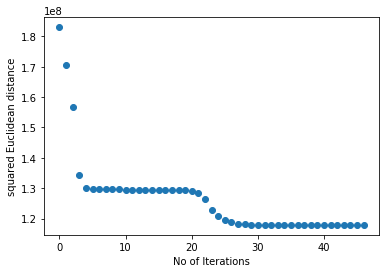

In [500]:
index = []
for i in range(len(y)):
        index.append(i)
plt.scatter(x=index , y=y)
plt.xlabel("No of Iterations")
plt.ylabel("Squared Euclidean distance")
plt


## Visualising Obama back with the centroid

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

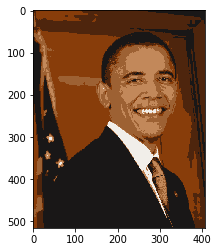

In [158]:
centroid = []
l = np.array(z[0])
for i in z[0]:
    centroid.append(np.array(z[1][i].astype(int)))

plt.imshow(np.reshape(centroid,(516,407,3)))
plt 

# End of Question 1. =)

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

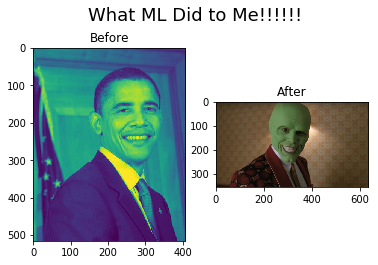

In [3]:
### end of Question 1
import matplotlib.image as mpimg
tr = mpimg.imread('hi.png')

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)

#plt.title('What ML Did to Me')

imgplot = plt.imshow(np.reshape(np.matrix(df[0]),(516,407)))
a.set_title('Before')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(tr)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.suptitle('What ML Did to Me!!!!!!',fontsize = 18)
plt

## Question 2 :

### Taking X(0,0) as a reference point, 

#### Using Manhattan Distance :
Distance to X(4,4) = 8
Distance to X(0,-6) = 6
Distance to X(-5,2) = 7

#### Using Euclidian distance :
Distance to X(4,4) = Root(32) 
Distance to X(0,-6) = Root(36)
Distance to X(-5,2) = Root(29)

#### Using Maximum Absolute Distance :
Distance to X(4,4) = 4
Distance to X(0,-6) = 6
Distance to X(-5,2) = 5

    In order for points to be in the same cluster, the distance between these points must be the smallest as compared to the distance between themselves and other points out of the cluster. 
    
#### Therefore, for A :
Maximum Absolute Distance is used because distance between X(0,0) to X(4,4) are the smallest.

#### B : Euclidian Distance

#### C : Manhattan Distance

## Question 3:
### Advantages:
There will be situations when our data sets more discrete and thus, calculating the means will not be logical. For example, when the goal of the problem is to identify one of the data sets or choosing an article, it does not make sense to find the mean because it would require creating a new article with average of all the different articles.

### Disadvantages:
It is computationally heavy and costly as compared to K means. Reason because we have to iterate through all the datasets and let all the data sets to be an examplar and calculate the cost. 